In [22]:
import pandas as pd
import numpy as np
import random
import warnings
import seaborn as sns
from pylab import mpl, plt

# best font and style settings for notebook
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = '微软雅黑'
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook


def run_simulation_numpy(num_people):

    # 初始化 NumPy 数组
    ids = np.arange(1, num_people + 1)
    killed_turn = np.full(num_people, -1)  # 初始化淘汰回合
    turn_num = num_people

    for turn in range(turn_num):
        alive_ids = ids[killed_turn == -1]  # 获取当前存活的ID
        if len(alive_ids) == 0:  # 如果没有存活者，提前退出循环
            break

        random_odd_idx = random.randrange(1, len(alive_ids) + 1, 2)
        kill_id = alive_ids[random_odd_idx - 1] - 1  # 选择要淘汰的ID

        killed_turn[kill_id] = turn + 1  # 记录淘汰回合

    return killed_turn


#
num_people = 600
N = 5000
df_simul = pd.DataFrame({"id": range(1, 1 + num_people)})
np_simul = np.arange(1, 1 + num_people)
np_simul = np.expand_dims(np_simul, 1)
for i in tqdm_notebook(range(N)):
    result_np = run_simulation_numpy(num_people).reshape(-1, 1)
    np_simul = np.concatenate((np_simul, result_np), axis=1)

pd.DataFrame(np_simul)

  0%|          | 0/5000 [00:00<?, ?it/s]

,0,1,2,3,4,5,6,7,8,9,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,5000
0,1,314,78,207,297,414,294,32,82,121,...,142,142,53,19,214,432,289,195,131,103
1,2,542,503,273,580,541,382,416,382,532,...,259,210,207,85,331,579,491,343,414,272
2,3,32,526,85,34,69,144,502,58,546,...,300,300,226,13,141,22,179,67,41,278
3,4,307,107,542,588,122,442,280,61,513,...,162,206,86,201,389,43,513,164,458,237
4,5,543,235,256,341,201,482,321,11,93,...,178,94,490,289,415,288,484,384,179,368
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,596,468,174,313,287,281,260,600,26,58,...,56,580,415,508,347,392,317,116,473,135
596,597,444,423,468,492,87,155,372,331,462,...,228,49,298,558,71,53,75,314,31,502
597,598,364,530,160,338,137,295,377,88,284,...,369,126,174,530,581,405,293,582,463,296
598,599,222,370,178,257,99,594,534,219,386,...,183,292,556,390,600,325,436,143,546,276


In [28]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm

# 设置警告忽略和样式
warnings.filterwarnings('ignore')
sns.set_style("white")
mpl.rcParams['font.family'] = '微软雅黑'


def run_simulation_numpy(num_people):
    """
    执行一次模拟游戏，返回每个人被淘汰的轮次。
    """
    ids = np.arange(1, num_people + 1)
    killed_turn = np.full(num_people, -1)  # 初始化淘汰回合
    turn_num = num_people

    for turn in range(turn_num):
        alive_ids = ids[killed_turn == -1]  # 获取当前存活的ID
        if len(alive_ids) == 0:  # 如果没有存活者，提前退出循环
            break

        # 选择一个随机的奇数索引
        random_odd_idx = random.randrange(1, len(alive_ids) + 1, 2)
        kill_id = alive_ids[random_odd_idx - 1] - 1  # 选择要淘汰的ID

        killed_turn[kill_id] = turn + 1  # 记录淘汰回合

    return killed_turn, kill_id + 1


# 模拟参数
num_people = 600
N = 5000

# 初始化DataFrame
df_simul = pd.DataFrame({"id": range(1, 1 + num_people)})

# 预先分配足够的内存空间
np_simul = np.zeros((num_people, N + 1), dtype=int)
np_simul[:, 0] = np.arange(1, 1 + num_people)

winner_ids = []
# 运行模拟
for i in tqdm(range(N)):
    # winner id add to list and val count
    result_np, winner_id = run_simulation_numpy(num_people)
    np_simul[:, i + 1] = result_np
    winner_ids.append(winner_id)

# 转换为DataFrame
df_simul = pd.DataFrame(np_simul)

a = winner_ids
b = np.array(range(1, 1 + num_people))

last_killed_counts = pd.DataFrame({
    'id':
    b,
    'win_count':
    pd.DataFrame(np.concatenate((a, b))).value_counts().sort_index().values - 1
})
last_killed_counts.plot(
    x='id',
    y='win_count',
    figsize=(13, 6),
    title=
    f"Each id win counts: {N} turns for {num_people} people kill simulation")
last_killed_counts.to_csv("./result/stats/each_ids_win_counts.csv",
                          index=False)

plt.savefig(
    f"./result/Each id win counts: {N} turns for {num_people} people kill simulation.svg"
)

df_simul['mean'] = df_simul.iloc[:, 1:].mean(axis=1)
df_simul['id'] = np.array(range(1, 1 + num_people))
df_simul[['id',
          'mean']].to_csv("./result/stats/each_ids_avg_survival_turns.csv",
                          index=False)

100%|██████████| 5000/5000 [00:07<00:00, 675.63it/s]


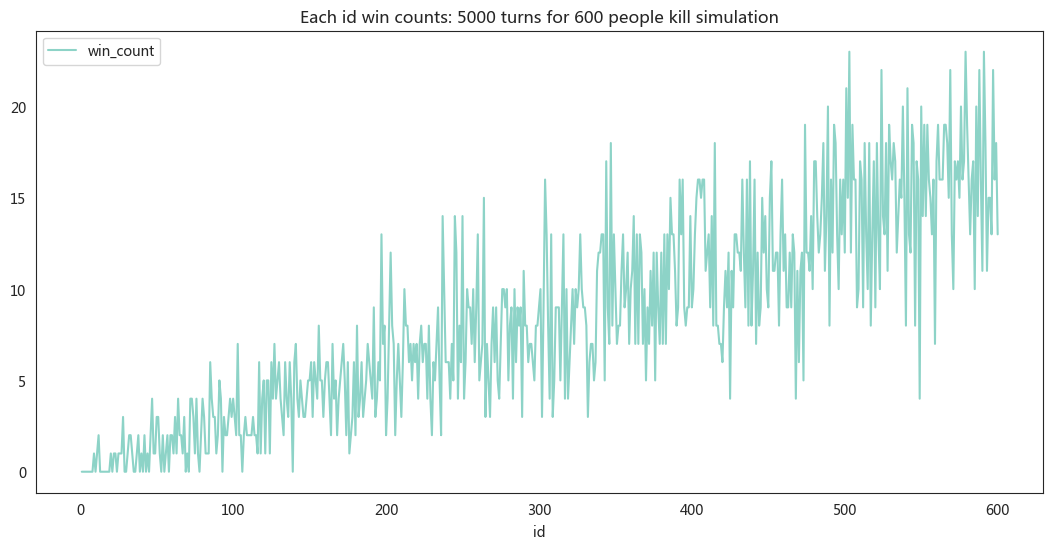

In [33]:
a = winner_ids
b = np.array(range(1, 1 + num_people))

last_killed_counts = pd.DataFrame({
    'id':
    b,
    'win_count':
    pd.DataFrame(np.concatenate((a, b))).value_counts().sort_index().values - 1
})
last_killed_counts.plot(
    x='id',
    y='win_count',
    figsize=(13, 6),
    title=
    f"Each id win counts: {N} turns for {num_people} people kill simulation")
last_killed_counts.to_csv("./result/stats/each_ids_win_counts.csv",
                          index=False)


df_simul['mean'] = df_simul.iloc[:, 1:].mean(axis=1)
df_simul['id']=np.array(range(1, 1 + num_people))
df_simul[['id', 'mean']].to_csv("./result/stats/each_ids_avg_survival_turns.csv",
                             index=False)

<Axes: xlabel='0'>

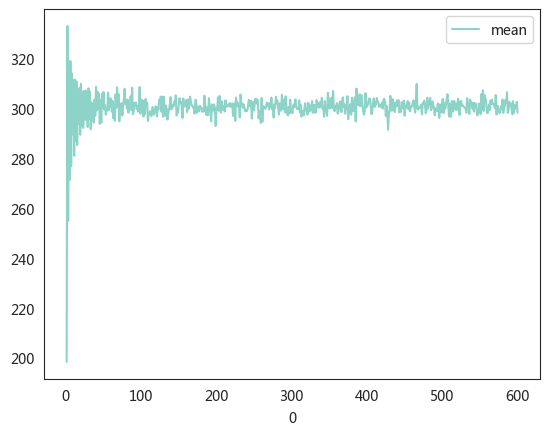

In [47]:
df_simul['mean'] = df_simul.iloc[:, 1:].mean(axis=1)
df_simul['id']=np.array(range(1, 1 + num_people))
df_simul[['id', 'mean']].to_csv("./result/stats/each_ids_avg_survival_turns.csv",
                             index=False)
# df_simul.plot(x=0, y='mean')